#### Homework 10

In [34]:
import numpy as np
import scipy.stats
from scipy.stats import beta, norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")
%matplotlib inline

In [25]:
def beta_to_gauss(alpha, beta):
    mu = alpha/(alpha + beta)
    sigma = np.sqrt((alpha*beta)/(((alpha + beta)**2)*(alpha + beta + 1)))
    return mu, sigma

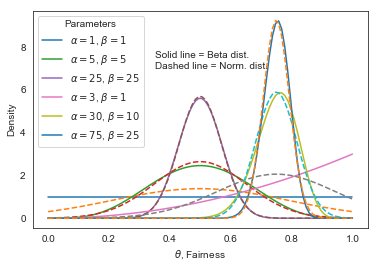

In [28]:
x = np.linspace(0, 1, 100)    
params = [
    (1, 1),
    (5, 5),
    (25, 25),
    (3, 1),
    (30, 10),
    (75, 25)
]
for p in params:
    y1 = beta.pdf(x, p[0], p[1])
    mu, sigma = beta_to_gauss(p[0], p[1])
    y2 = norm.pdf(x, mu, sigma)
    plt.plot(x, y1, label="$\\alpha={}$, $\\beta={}$".format(p[0],p[1]))
    plt.plot(x, y2, '--')
    
plt.text(0.35, 7, 'Solid line = Beta dist.\nDashed line = Norm. dist.')
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.legend(title="Parameters", loc='best')
plt.show()

For distributions with less variability, the Gaussian very closely approximates the Beta distribution. Whereas with wider distributions, the two strategies are further apart from one another.

---

In [30]:
def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta)$", fontsize=20)
    ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));

In [29]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

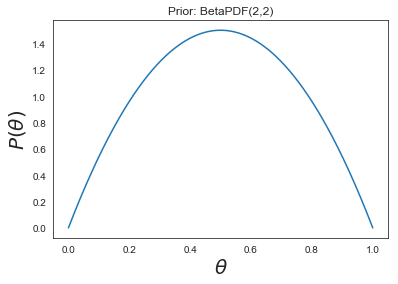

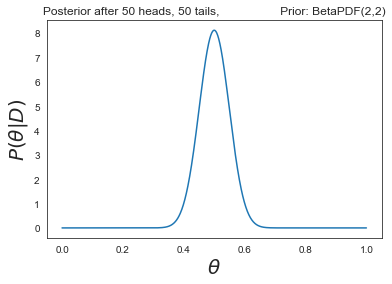

In [33]:
plot_prior(alpha=2, beta=2)
plot_posterior(heads=50, tails=50, alpha=2, beta=2)